In [83]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import log2
from math import sqrt
from numpy import asarray
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import glob
import missingno as msno
import datetime
#from fbprophet import Prophet
%matplotlib inline
import mplcyberpunk

In [84]:
df14 = pd.read_csv('epa_tw_14.csv')
df15 = pd.read_csv('epa_tw_15.csv')
df16 = pd.read_csv('epa_tw_16.csv')
df17 = pd.read_csv('epa_tw_17.csv')
df18 = pd.read_csv('epa_tw_18.csv')
###########################################
df14 = df14.rename(columns={"PM2.5": "PM"})
df15 = df15.rename(columns={"PM2.5": "PM"})
df16 = df16.rename(columns={"PM2.5": "PM"})
df17 = df17.rename(columns={"PM2.5": "PM"})
df18 = df18.rename(columns={"PM2.5": "PM"})
df4= pd.DataFrame(df14)
df5= pd.DataFrame(df15)
df6= pd.DataFrame(df16)
df7= pd.DataFrame(df17)
df8= pd.DataFrame(df18)

In [85]:
r=(df4[df14.SiteEngName =='Annan'])
s=(df5[df15.SiteEngName =='Annan'])
t=(df6[df16.SiteEngName =='Annan'])
u=(df7[df17.SiteEngName =='Annan'])
v=(df8[df18.SiteEngName =='Annan'])
#print(r.PM==s.PM)
#print(r.PM)
p=r.PM
q=s.PM
p1=t.PM
q1=u.PM
p2=v.PM;

In [86]:
p01=np.array(p)
q01=np.array(q)
print(p01)

[52. 49. 53. ... 55. 56. 53.]


In [87]:
p01

array([52., 49., 53., ..., 55., 56., 53.])

In [88]:
p.describe()

count    8760.000000
mean       29.501163
std        21.060859
min         1.000000
25%        14.000000
50%        26.000000
75%        40.000000
max       166.000000
Name: PM, dtype: float64

In [89]:
counts, bin_edges = np.histogram(p, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y4=counts
counts, bin_edges = np.histogram(p1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y5=counts
counts, bin_edges = np.histogram(p1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y6=counts
counts, bin_edges = np.histogram(q1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y7=counts
counts, bin_edges = np.histogram(p2, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y8=counts

[ 415  940 1037 1010  826  759  879  602  519  403  360  250  180  151
  131   62   56   35   31   25   89]
[ 613 1220 1079 1216  697  808  692  481  510  298  294  185  179  120
  113   70   68   40   29   21   50]
[ 613 1220 1079 1216  697  808  692  481  510  298  294  185  179  120
  113   70   68   40   29   21   50]
[ 414 1065 1255 1145 1174  953  726  576  534  296  212  143   97   76
   42   30    8    5    4    1    4]
[ 592 1197 1339 1164  933  858  727  662  417  309  185  106   64   67
   48   35   28   13    5    5    6]


In [90]:
an=np.array(y4)
an


array([ 415,  940, 1037, 1010,  826,  759,  879,  602,  519,  403,  360,
        250,  180,  151,  131,   62,   56,   35,   31,   25,   89],
      dtype=int64)

In [91]:
an1=np.array(y5)
an1


array([ 613, 1220, 1079, 1216,  697,  808,  692,  481,  510,  298,  294,
        185,  179,  120,  113,   70,   68,   40,   29,   21,   50],
      dtype=int64)

In [92]:
an2=np.array(y6)
an2


array([ 613, 1220, 1079, 1216,  697,  808,  692,  481,  510,  298,  294,
        185,  179,  120,  113,   70,   68,   40,   29,   21,   50],
      dtype=int64)

In [93]:
an3=np.array(y7)
an3


array([ 414, 1065, 1255, 1145, 1174,  953,  726,  576,  534,  296,  212,
        143,   97,   76,   42,   30,    8,    5,    4,    1,    4],
      dtype=int64)

In [94]:
an4=np.array(y8)
an4

array([ 592, 1197, 1339, 1164,  933,  858,  727,  662,  417,  309,  185,
        106,   64,   67,   48,   35,   28,   13,    5,    5,    6],
      dtype=int64)

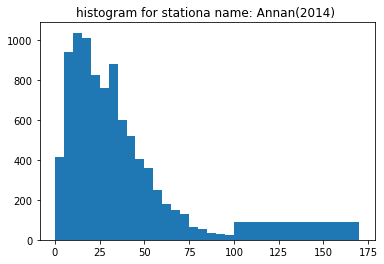

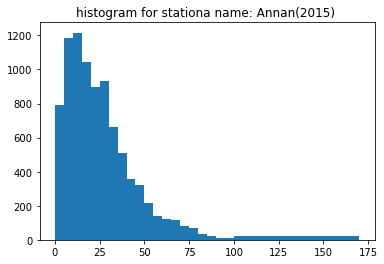

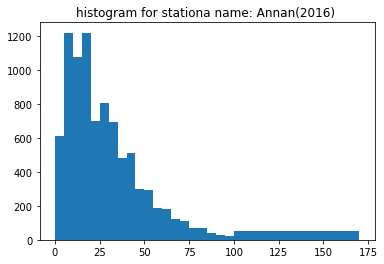

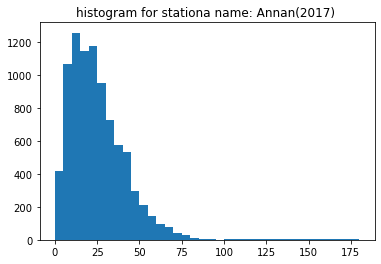

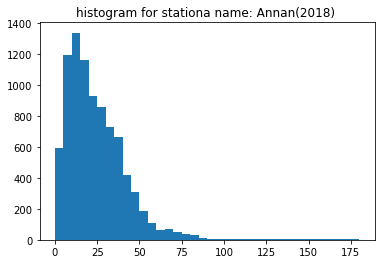

In [95]:
plt.hist(p, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170]) 
plt.title("histogram for stationa name: Annan(2014) ") 
plt.show()
plt.hist(q, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170]) 
plt.title("histogram for stationa name: Annan(2015) ") 
plt.show()
plt.hist(p1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170]) 
plt.title("histogram for stationa name: Annan(2016) ") 
plt.show()
plt.hist(q1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,180]) 
plt.title("histogram for stationa name: Annan(2017) ") 
plt.show()
plt.hist(p2, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,180]) 
plt.title("histogram for stationa name: Annan(2018) ") 
plt.show()

In [96]:
p.mean()

29.501163242009127

In [97]:
print(y4.mean())
print(y5.mean())
print(y6.mean())
print(y7.mean())
print(y8.mean())
print('minimum value')
print(y4.min())
print(y5.min())
print(y6.min())
print(y7.min())
print(y8.min())

417.14285714285717
418.23809523809524
418.23809523809524
417.14285714285717
417.14285714285717
minimum value
25
21
21
1
5


In [98]:
from time import sleep

print('Will it get printed immediately?', end='')
sleep(5)

Will it get printed immediately?

In [99]:
y4

array([ 415,  940, 1037, 1010,  826,  759,  879,  602,  519,  403,  360,
        250,  180,  151,  131,   62,   56,   35,   31,   25,   89],
      dtype=int64)

In [100]:
from scipy import stats
#rvs = stats.norm.rvs(loc = 5, scale = 10, size = (50,2))
print (stats.ttest_1samp(y4,25.0))
print (stats.ttest_1samp(y5,417.0))
print (stats.ttest_1samp(y6,418.0))
print (stats.ttest_1samp(y7,417))
print (stats.ttest_1samp(y8,417))


Ttest_1sampResult(statistic=4.979771248737756, pvalue=7.200261935556254e-05)
Ttest_1sampResult(statistic=0.01412631965606575, pvalue=0.9888691713031061)
Ttest_1sampResult(statistic=0.002716599933858823, pvalue=0.9978593840328042)
Ttest_1sampResult(statistic=0.0014390647359298436, pvalue=0.998866050250841)
Ttest_1sampResult(statistic=0.001432271370245072, pvalue=0.9988714032621252)


In [101]:
print('normaltest teststat = %6.3f pvalue = %6.4f' %
      stats.normaltest((y4-y4.mean())/y4.std()))

normaltest teststat =  5.009 pvalue = 0.0817


In [102]:
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(y4))

normaltest teststat =  5.009 pvalue = 0.0817


In [103]:
print('normaltest teststat = %6.3f pvalue = %6.4f' %
      stats.normaltest((y4-y4.mean())/y4.std()))

normaltest teststat =  5.009 pvalue = 0.0817


In [104]:
d, pval = stats.kstest((y4-y4.mean())/y4.std(), 'norm')
print('KS-statistic D = %6.3f pvalue = %6.4f' % (d, pval))

KS-statistic D =  0.178 pvalue = 0.4644


In [105]:
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_1samp(y4,417))

t-statistic =  0.002 pvalue = 0.9986


In [106]:
from scipy import stats
rvs = stats.norm.rvs(loc = 5, scale = 10, size = (50,2))

print (stats.ttest_1samp(rvs,5.0))
rvs.min()

Ttest_1sampResult(statistic=array([-0.79376278, -1.11920522]), pvalue=array([0.43116083, 0.26850911]))


-19.236285561720457

In [107]:
stats.describe(y4)

DescribeResult(nobs=21, minmax=(25, 1037), mean=417.14285714285717, variance=130223.42857142857, skewness=0.4822040865514121, kurtosis=-1.2611380307964923)

In [108]:
data = {
...     'a': [0.9, 1.0, 1.1, 1.2],
...     'b': [0.8, 0.9, 1.0, 1.1],
...     'c': [4.9, 5.0, 5.1, 5.2],
... }
from scipy.stats import f_oneway
t, p =  f_oneway(*data.values())
p

7.959305946158634e-12

In [109]:
np.random.seed(282629734)
x = stats.t.rvs(10, size=1000)
m, v, s, k = stats.t.stats(10, moments='mvsk')
n, (smin, smax), sm, sv, ss, sk = stats.describe(x)
sstr = '%-14s mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f'
print(sstr % ('distribution:', m, v, s ,k))

print(sstr % ('sample:', sm, sv, ss, sk))
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_1samp(x, m))
x.min()

distribution:  mean = 0.0000, variance = 1.2500, skew = 0.0000, kurtosis = 1.0000
sample:        mean = 0.0141, variance = 1.2903, skew = 0.2165, kurtosis = 1.0556
t-statistic =  0.391 pvalue = 0.6955


-3.7897557242248197

In [110]:
stats.describe(x)

DescribeResult(nobs=1000, minmax=(-3.7897557242248197, 5.263277329807165), mean=0.014061066398468422, variance=1.2902841462255106, skewness=0.21652778283120955, kurtosis=1.055594041706331)

In [111]:
print (stats.ttest_1samp(y4,4.0))


Ttest_1sampResult(statistic=5.246447523260325, pvalue=3.910699018645715e-05)


In [112]:
from math import log2
from math import sqrt
from numpy import asarray
 
# calculate the kl divergence
def kl_divergence(pr, qr):
	return sum(pr[i] * log2(pr[i]/qr[i]) for i in range(len(pr)))
pr=np.asarray(y4)
qr=np.asarray(y5)
def js_divergence(pr, qr):
	m = (0.5 * (pr + qr))
	return 0.5 * kl_divergence(pr, m) + (0.5 * kl_divergence(qr, m))
js_pq = js_divergence(pr, qr)
print('JS(P || Q) divergence: %.4f bits' % js_pq)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq))

JS(P || Q) divergence: 69.8589 bits
JS(P || Q) distance: 8.358


In [113]:
from scipy.spatial.distance import jensenshannon
from numpy import asarray

In [114]:
a=df14['SiteEngName'].unique()
opv=[]
for i in range(76):
    a1=(df4[df14.SiteEngName==a[i]])
    a2=(df5[df15.SiteEngName==a[i]])
    a3=(df6[df16.SiteEngName==a[i]])
    a4=(df7[df17.SiteEngName==a[i]])
    a5=(df8[df18.SiteEngName==a[i]])
    b1=a1.PM
    b2=a2.PM
    b3=a3.PM
    b4=a4.PM
    b5=a5.PM
    print('==============')
    print(a[i])
    counts, bin_edges = np.histogram(b1,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y4=counts
    print(y4)
    counts, bin_edges = np.histogram(b2,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y5=counts
    print(y5)
    counts, bin_edges = np.histogram(b3,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y6=counts
    print(y6)
    counts, bin_edges = np.histogram(b4,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y7=counts
    print(y7)
    counts, bin_edges = np.histogram(b5,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y8=counts
    print(y8)
    print('=============')
    ye45=jensenshannon(y4,y5)
    ye46=jensenshannon(y4,y6)
    ye47=jensenshannon(y4,y7)
    ye48=jensenshannon(y4,y8)
    ye56=jensenshannon(y5,y6)
    ye57=jensenshannon(y5,y7)
    ye58=jensenshannon(y5,y8)
    ye67=jensenshannon(y6,y7)
    ye68=jensenshannon(y6,y8)
    ye78=jensenshannon(y7,y8)
    je=np.array([ye45,ye46,ye47,ye48,ye56,ye57,ye58,ye67,ye68,ye78])
    print(je)
    print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(je))
    k2, op=stats.normaltest(je)
    print(op)
    opv.append(op)
    #a5.nlargest(20,['PM'])
    
    #print(js_divergence(ab4,ab5))
    #print(js_divergence(ab5,ab4))
    #print(js_divergence(y5,y6))
    #print(js_divergence(y6,y5))
    #print(js_divergence(y6,y7))
   # print(js_divergence(y7,y6))
   # print(js_divergence(y7,y8))
   # print(js_divergence(y8,y7))
    
    

Annan
[ 415  940 1037 1010  826  759  879  602  519  403  360  250  180  151
  131   62   56   35   31   25   89]
[ 793 1186 1216 1042  895  935  661  512  358  321  214  139  122  116
   80   67   34   25   12    9   23]
[ 613 1220 1079 1216  697  808  692  481  510  298  294  185  179  120
  113   70   68   40   29   21   50]
[ 414 1065 1255 1145 1174  953  726  576  534  296  212  143   97   76
   42   30    8    5    4    1    4]
[ 592 1197 1339 1164  933  858  727  662  417  309  185  106   64   67
   48   35   28   13    5    5    6]
[0.11015775 0.07429393 0.12447045 0.12674355 0.07197388 0.09402051
 0.0651907  0.1180034  0.101673   0.06089693]
normaltest teststat =  3.277 pvalue = 0.1942
0.194223187655058
Banqiao


C:\Users\Khalid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


[ 418  990 1652 1795  950  887  611  400  324  218  114  107   87   46
   58   33   15   21   20    7    7]
[ 393  868 1834 1932 1265  855  516  369  257  165  113   54   53   38
   25   16    4    2    1    0    0]
[ 950 1590 1550 1424 1100  604  470  271  249  200  125   88   78   39
   22   10    4    5    4    1    0]
[ 832 2016 2008 1164  976  670  429  272  152  114   54   38   14   12
    5    3    1    0    0    0    0]
[ 629 1905 1663 1721 1084  727  456  213  165   85   42   37    3   11
    7    7    4    1    0    0    0]
[0.07652382 0.130262   0.18194856 0.15927364 0.13610092 0.17255488
 0.14260695 0.09967608 0.10626174 0.07695153]
normaltest teststat =  1.124 pvalue = 0.5699
0.5699325962823711
Cailiao
[  42  400 1224 1876 1396 1326  865  441  394  207  191  133   79   62
   43   29   22   10    4    7    9]
[1743 1943 1482 1101  576  475  447  303  254  156  114   60   46   24
   19    7    7    1    1    1    0]
[ 286 1867 2233 1724 1147  585  335  225  166  113   62   2

[ 125  386  692 1049 1229 1074  873  733  588  461  471  275  235  121
  116   68   55   44   37   26  100]
[ 363  835  994 1335 1114  926  770  574  429  338  287  198  140   98
   73   77   60   39   36   16   58]
[ 778 1126 1564 1417 1020  702  605  456  291  218  190  121  110   53
   43   28   17    5   10    5   25]
[ 579 1330 1674 1452 1164  822  592  403  228  184  130   86   46   42
    9    8    3    2    1    3    2]
[  92  636 1586 1823 1251 1138  745  467  347  252  144  125   67   30
   28   17    4    4    4    0    0]
[0.12805976 0.24788662 0.28106953 0.21509867 0.13371827 0.17192465
 0.15939539 0.07722153 0.17220506 0.15463018]
normaltest teststat =  0.405 pvalue = 0.8168
0.8167793595950654
Fengshan
[ 659  775 1014  899  599  746  716  620  659  521  419  281  250  171
  104   82   76   42   23   18   86]
[ 895 1250  938  972  891  657  703  629  400  406  330  186  154  129
   53   53   38   30   15   13   18]
[ 752 1273 1057 1034  707  829  574  486  545  337  324  2

[ 528 1485 1571 1728  951  954  516  382  190  179   92   70   24   23
    9   13    7   11    8    3   16]
[ 787 1368 1947 1419 1200  640  524  363  236  110   55   21   19   12
   20   16   10    5    3    3    2]
[1325 1741 2020 1455  894  570  281  225  124   56   38   15   21   15
    2    0    0    0    0    0    0]
[ 894 2076 1771 1615  994  519  450  183  154   58   16   13    5    7
    2    2    1    0    0    0    0]
[ 952 2491 2128 1470  924  393  217  101   52   19    5    2    2    1
    1    0    0    0    1    0    1]
[0.09308824 0.15978637 0.13949904 0.21098506 0.11578296 0.10643077
 0.17731548 0.0792224  0.10852481 0.09383739]
normaltest teststat =  1.707 pvalue = 0.4260
0.4259663979909536
Kinmen
[ 496  726  824  847 1003  920  789  721  520  398  274  240  179  157
  172  109   65   49   46   49  174]
[ 281  781 1182 1271 1231  976  774  587  410  358  210  156  109   94
   83   67   49   31   34   21   55]
[1414 1137 1046  981  861  712  594  413  432  288  249  156

[ 113  517  984 1107  979  872  729  647  697  524  378  301  228  239
  132   93   61   47   36   25   51]
[ 738 1020 1117  892  912  826  720  725  493  351  279  186  166  105
   84   58   34   26   12   10    6]
[  33  664 1252 1520 1071 1091  719  683  553  398  299  172  153   57
   41   30   11   17   10    6    4]
[ 467  894 1262 1216 1071  996  724  732  482  332  220  131   86   43
   46   15   26    8    6    1    2]
[ 430 1064 1388 1587 1114  908  905  508  333  235  117   63   41   27
   11    6    2    4    8    0    9]
[0.1679704  0.13274813 0.17398521 0.23272879 0.18167898 0.09085978
 0.15937175 0.13009485 0.16409102 0.09512065]
normaltest teststat =  0.234 pvalue = 0.8895
0.8895243681940735
Nanzi
[949 955 729 798 535 698 567 630 484 602 471 299 296 168 156 102  95  55
  44  25 102]
[1473 1206  990  901  683  772  665  548  406  300  232  149  117   92
   76   50   23   15   11   15   36]
[ 420  955 1284 1221 1062  805  712  585  547  353  279  192  149   80
   53   28 

[ 779 1337 1338 1446  942  742  616  416  372  220  163  159   88   47
   47   40   23    5    4    0    0]
[ 789 1440 1703 1396 1010  799  494  380  227  169  145   79   48   30
   18    9    7    2    3    6    6]
[ 739 1318 1990 1366 1000  693  580  332  269  170  141   64   36   14
   12   13    9    5    6    2    1]
[0.267493   0.20418629 0.23655198 0.24052897 0.08904077 0.10439681
 0.12137266 0.07850577 0.09265836 0.04497255]
normaltest teststat =  3.176 pvalue = 0.2044
0.20437914120241116
Shanhua
[ 558  761 1074  950  694  901  671  711  536  519  389  252  247  118
  125   72   42   37   18   18   67]
[ 746  884  974 1066  787  774  864  539  494  441  250  212  203  126
   92   80   62   50   41   27   48]
[ 836 1015 1163 1013 1001  665  636  539  521  332  276  236  144  109
   92   68   49   26   15   19   29]
[ 601  863 1228  937 1205  867  895  713  436  365  227  174   95   57
   37   32    7   12    3    3    3]
[1132  929 1078  973  989 1105  742  563  406  255  240  1

Xianxi
[ 358 1027 1195 1332 1058  843  659  438  456  321  272  207  151  112
   72   82   63   40   24   10   40]
[ 415 1087 1499 1273 1108  826  640  469  349  289  235  179  118   80
   77   46   27   24    8    3    8]
[ 129  872 1351 1364 1167  944  720  716  397  310  225  177  127  106
   64   37   31   15   12    8   12]
[  29  520 1764 1687 1358 1030  705  490  361  281  168  128   86   49
   33   39    8   13    5    4    2]
[ 620 1422 1585 1385 1171  723  529  459  308  248  142   56   42   20
   26    9    7    4    2    2    0]
[0.06305271 0.09096286 0.16591332 0.14991535 0.08854914 0.15174898
 0.10441373 0.10600592 0.16158778 0.19467374]
normaltest teststat =  1.071 pvalue = 0.5853
0.5852784862028355
Xiaogang
[ 340  741 1090  848  819  827  910  669  544  462  422  327  214  167
  118   70   52   30   20    8   82]
[ 603 1218 1069  881  802  707  623  569  512  437  372  265  181  152
   95   79   59   36   31   21   48]
[1356 1143  998  828  617  675  597  500  372  390 

Zhongming
[ 356  840 1269 1092 1132  811  835  582  386  352  215  210  144  142
  127   68   50   36   29   26   58]
[ 431 1056 1563 1091 1044  852  562  522  444  349  205  208  155   92
   57   58   24   12   10    8   17]
[ 612 1062 1639 1354  991  806  551  500  395  239  171  153   98   60
   40   48   21   23    4    5    8]
[ 464 1156 1306 1531 1291  833  743  517  271  242  164   91   59   33
   20   18    7    4    5    0    5]
[ 666 1424 1382 1503 1109  817  549  471  304  166  129   84   45   33
   23   17   12   10    9    4    3]
[0.08150901 0.11559783 0.13679011 0.16163116 0.06182115 0.10895859
 0.11952364 0.0843726  0.07627993 0.06452447]
normaltest teststat =  0.778 pvalue = 0.6778
0.6777959598199319
Zhongshan
[ 244 1017 1979 1659 1427  897  530  427  235  156   69   45   25   15
   14    4    5    4    2    4    2]
[ 859 1315 1573 1631 1069  727  514  407  228  170   85   54   44   18
   22   19   10    8    5    0    2]
[ 934 1627 1850 1289  958  738  410  291  258  

In [115]:
import pandas as pd 
import numpy as np 
  
# creating the Numpy array 
array = np.array([[1, 1, 1], [2, 4, 8], [3, 9, 27],  
                  [4, 16, 64], [5, 25, 125], [6, 36, 216],  
                  [7, 49, 343]]) 
  
# creating a list of index names 
index_values = ['first', 'second', 'third', 
                'fourth', 'fifth', 'sixth', 'seventh'] 
   
# creating a list of column names 
column_values = ['number', 'squares', 'cubes'] 
  
# creating the dataframe 
df = pd.DataFrame(data = array,  
                  index = index_values,  
                  columns = column_values) 
  
# displaying the dataframe 
print(df) 

         number  squares  cubes
first         1        1      1
second        2        4      8
third         3        9     27
fourth        4       16     64
fifth         5       25    125
sixth         6       36    216
seventh       7       49    343


In [116]:
p

7.959305946158634e-12

In [117]:
 import scipy.stats as stats

#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=y4, f_exp=y5)

Power_divergenceResult(statistic=585.2288342135016, pvalue=3.711854535666198e-111)

In [118]:
 import scipy.stats as stats

#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=y5, f_exp=y4)

Power_divergenceResult(statistic=520.574492940548, pvalue=1.423046750301435e-97)

In [119]:
column_values=['Pvalue'] 
df = pd.DataFrame(data = opv,  
                  index = a,  
                  columns = column_values) 
  
# displaying the dataframe 
print(df) 

             Pvalue
Annan      0.194223
Banqiao    0.569933
Cailiao    0.315589
Changhua   0.478134
Chaozhou   0.750122
...             ...
Zhongming  0.677796
Zhongshan  0.759157
Zhudong    0.404373
Zhushan    0.524342
Zuoying    0.578145

[76 rows x 1 columns]


In [120]:
df.nlargest(5, ['Pvalue']) 

,Pvalue
Dongshan,0.987311
Shanhua,0.957917
Xinying,0.945179
Puli,0.944590
Datong,0.938838


In [121]:
df.nsmallest(5, ['Pvalue'])

,Pvalue
Chiayi,0.037214
Songshan,0.040234
Fengyuan,0.043167
Xingang,0.076680
Sanyi,0.176619


C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM', ylabel='Density'>

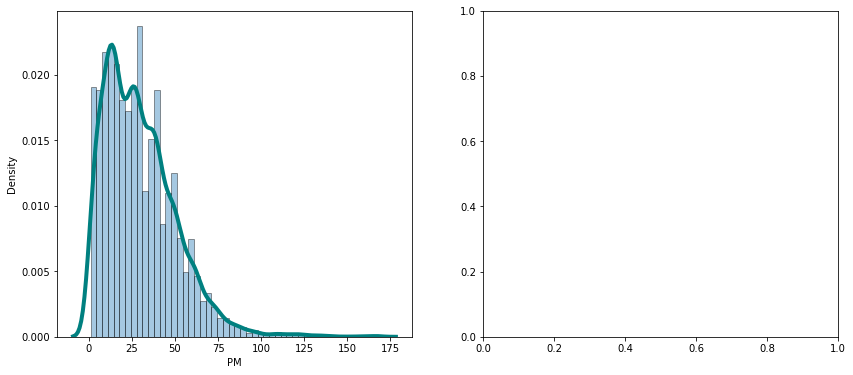

In [122]:
f,ax=plt.subplots(1,2,figsize=(14,6))
sns.distplot(df14[df14['SiteEngName']=='Shanhua'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4.0,'color':'teal' ,'label':'Year-14',},
             ax=ax[0])

C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'Dongshan'}, xlabel='PM', ylabel='Density'>

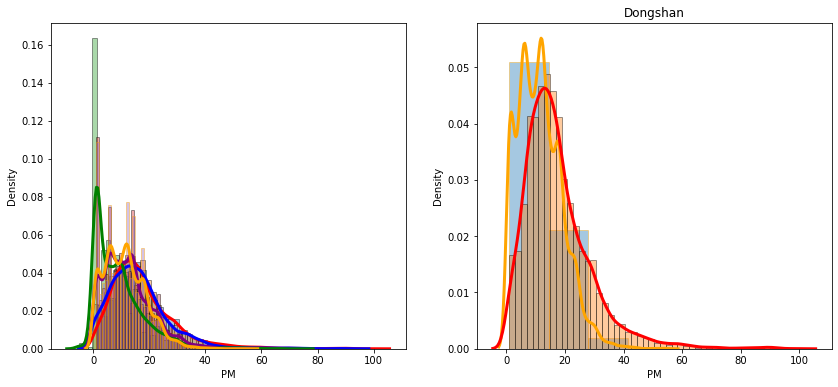

In [123]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('Dongshan')
sns.distplot(df14[df14['SiteEngName']=='Dongshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Dongshan')     
sns.distplot(df15[df15['SiteEngName']=='Dongshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Dongshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Dongshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Dongshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
plt.title('Dongshan')     
sns.distplot(df18[df18['SiteEngName']=='Dongshan'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Dongshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'Shanhua'}, xlabel='PM', ylabel='Density'>

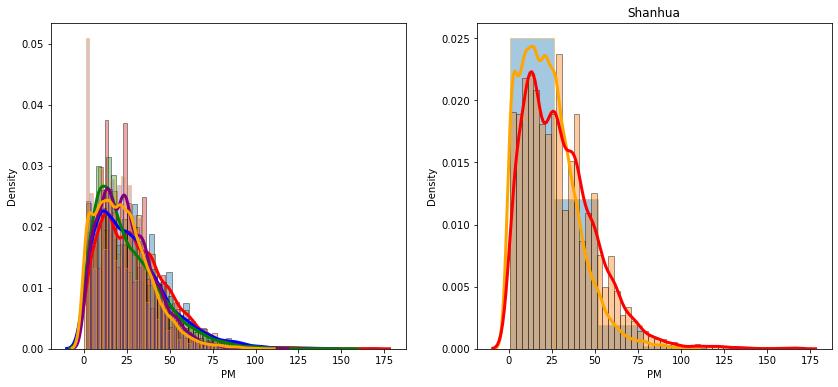

In [124]:
#plt.title('Shanhua')
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('Shanhua')
sns.distplot(df14[df14['SiteEngName']=='Shanhua'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
#plt.title('Shanhua',ax=ax[0])    
sns.distplot(df15[df15['SiteEngName']=='Shanhua'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Shanhua'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Shanhua'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Shanhua'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
#plt.title('Dongshan')     
sns.distplot(df18[df18['SiteEngName']=='Shanhua'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Shanhua'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'Xinying'}, xlabel='PM', ylabel='Density'>

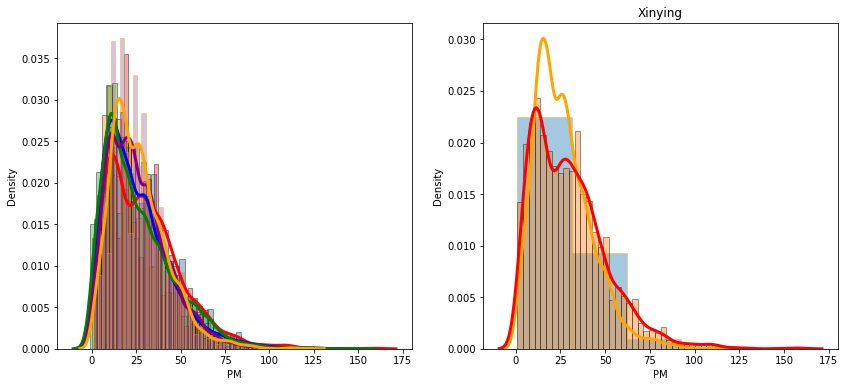

In [125]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Xinying'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Xinying')     
sns.distplot(df15[df15['SiteEngName']=='Xinying'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Xinying'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Xinying'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xinying'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xinying'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Xinying'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])

C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'Puli'}, xlabel='PM', ylabel='Density'>

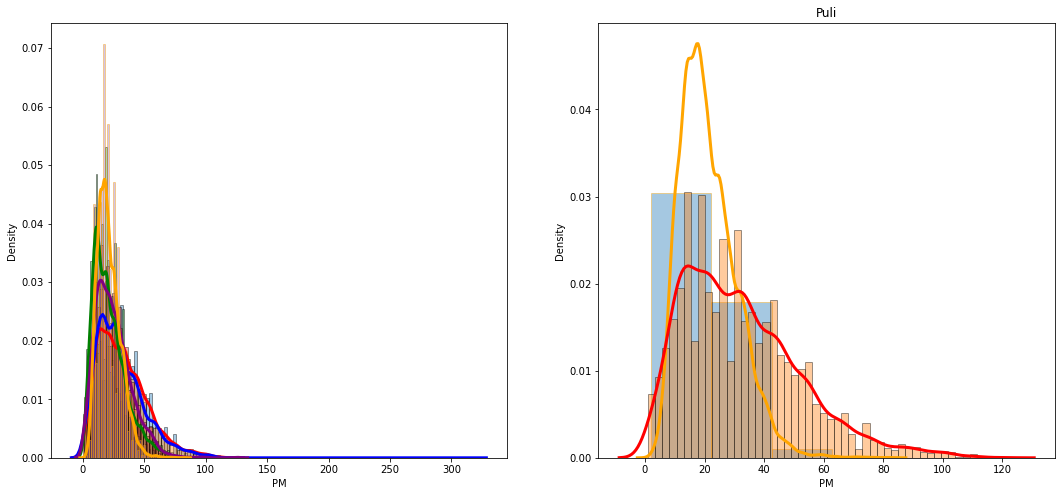

In [126]:
f,ax=plt.subplots(1,2,figsize=(18,8))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Puli'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Puli')     
sns.distplot(df15[df15['SiteEngName']=='Puli'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Puli'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Puli'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Puli'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Puli'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Puli'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])

C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'Datong'}, xlabel='PM', ylabel='Density'>

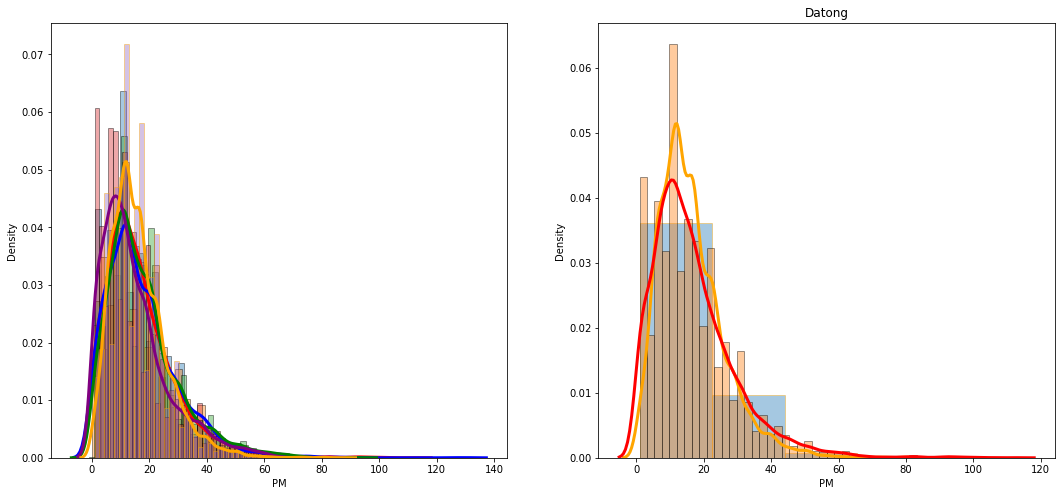

In [127]:
f,ax=plt.subplots(1,2,figsize=(18,8))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Datong')     
sns.distplot(df15[df15['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])

C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'Datong'}, xlabel='PM', ylabel='Density'>

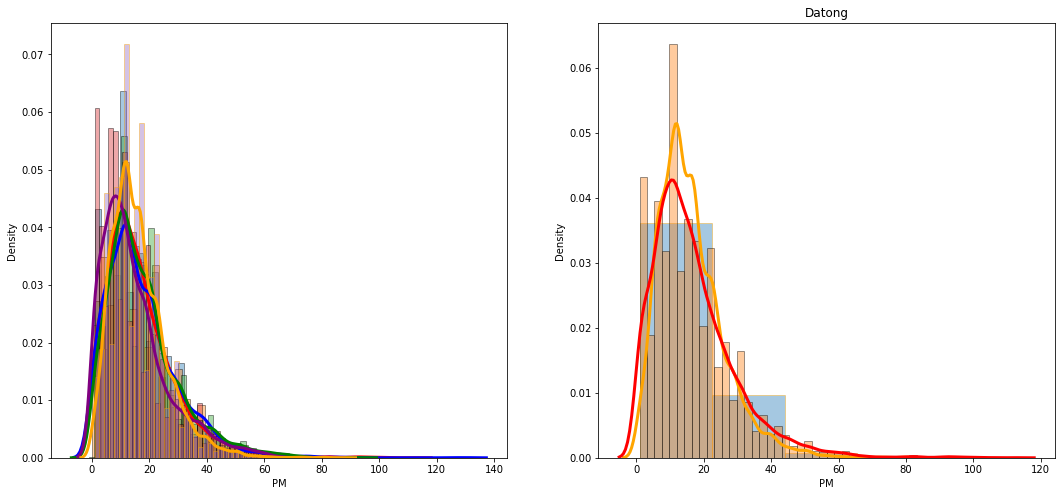

In [128]:
f,ax=plt.subplots(1,2,figsize=(18,8))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Datong')     
sns.distplot(df15[df15['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])

In [129]:
#"Chiayi	0.037214
#Songshan	0.040234
#Fengyuan	0.043167
#Xingang	0.076680
#Sanyi	0.176619"

C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'Chiayi'}, xlabel='PM', ylabel='Density'>

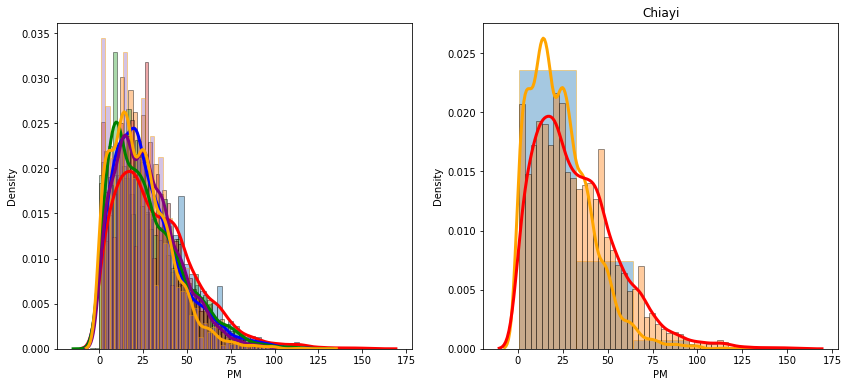

In [130]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Chiayi')     
sns.distplot(df15[df15['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'Songshan'}, xlabel='PM', ylabel='Density'>

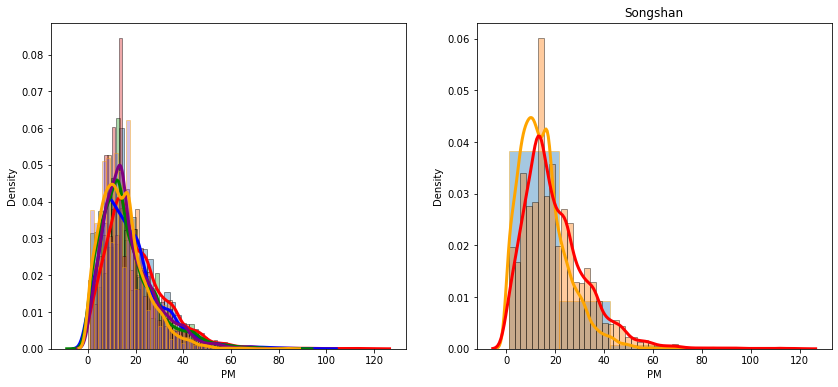

In [131]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Songshan')     
sns.distplot(df15[df15['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'Fengyuan'}, xlabel='PM', ylabel='Density'>

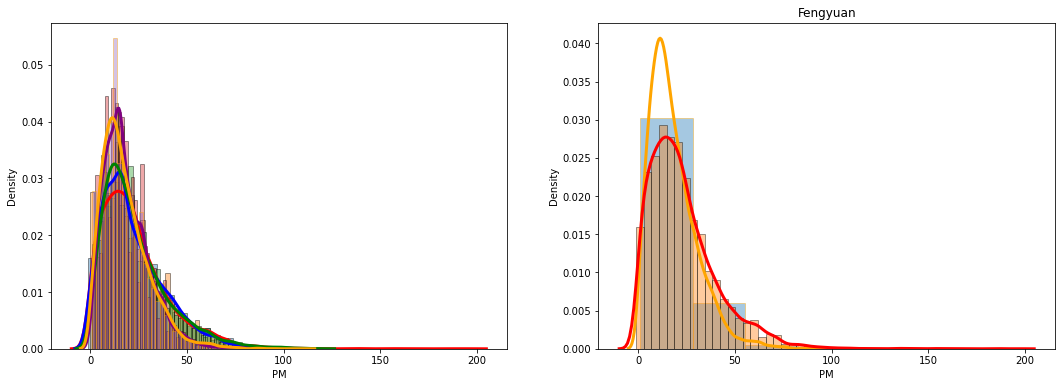

In [132]:
f,ax=plt.subplots(1,2,figsize=(18,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Fengyuan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Fengyuan')     
sns.distplot(df15[df15['SiteEngName']=='Fengyuan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Fengyuan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Fengyuan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Fengyuan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Fengyuan'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Fengyuan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'Xingang'}, xlabel='PM', ylabel='Density'>

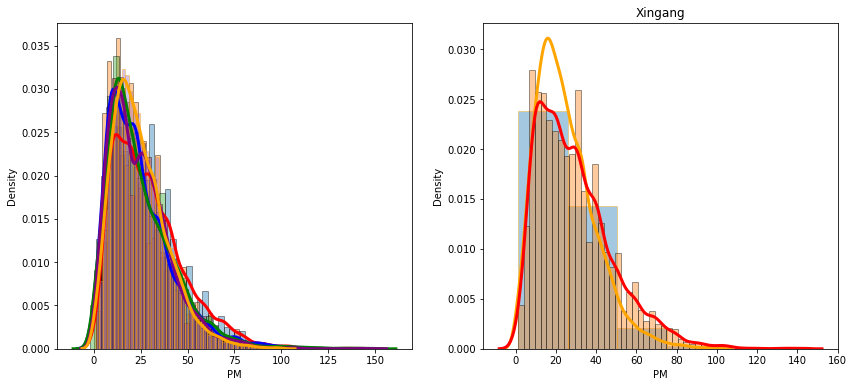

In [133]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Xingang'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Xingang')     
sns.distplot(df15[df15['SiteEngName']=='Xingang'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Xingang'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Xingang'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xingang'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xingang'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Xingang'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'Sanyi'}, xlabel='PM', ylabel='Density'>

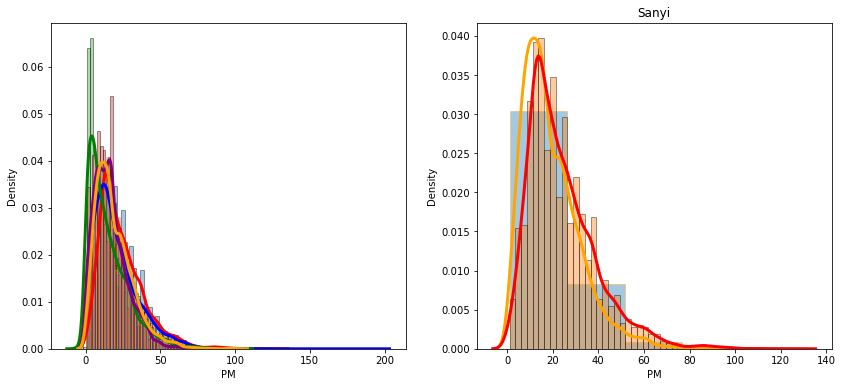

In [134]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Sanyi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Sanyi')     
sns.distplot(df15[df15['SiteEngName']=='Sanyi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Sanyi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Sanyi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Sanyi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Sanyi'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Sanyi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:xlabel='PM', ylabel='Density'>

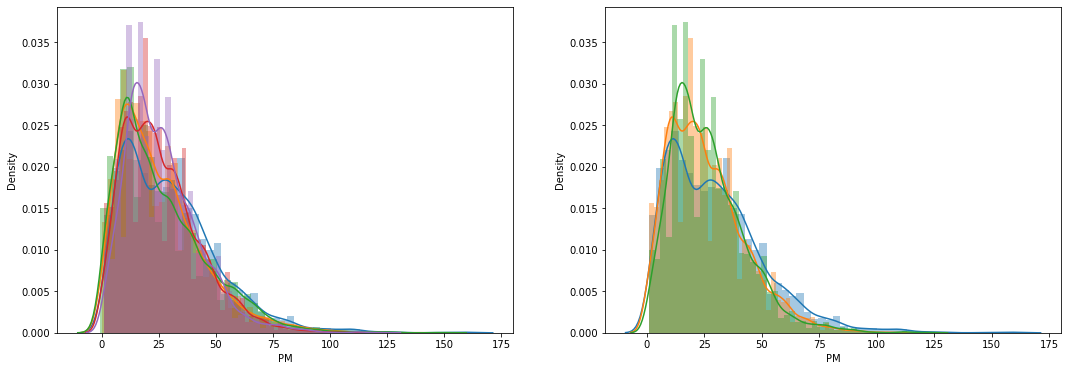

In [135]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Xinying'].PM,ax=ax[0])
sns.distplot(df15[df15['SiteEngName']=='Xinying'].PM,ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Xinying'].PM,ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Xinying'].PM,ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xinying'].PM,ax=ax[0])

sns.distplot(df14[df14['SiteEngName']=='Xinying'].PM,ax=ax[1])
sns.distplot(df17[df17['SiteEngName']=='Xinying'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Xinying'].PM,ax=ax[1])


C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:xlabel='PM', ylabel='Density'>

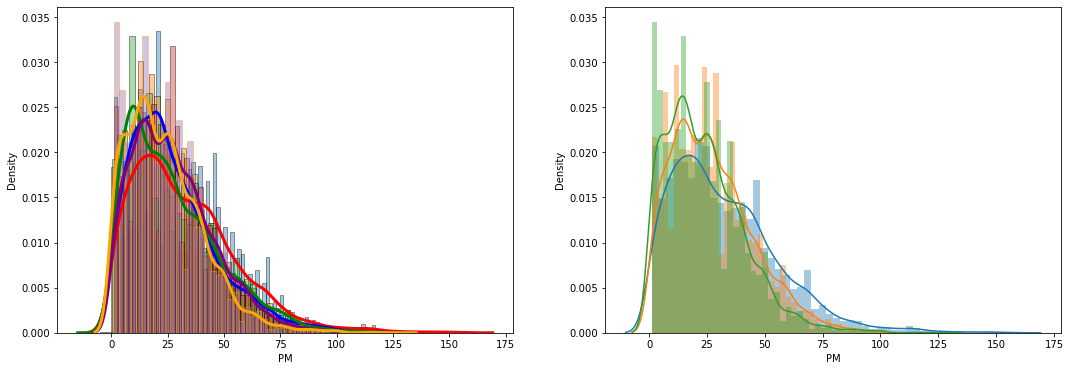

In [136]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=100,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
            
sns.distplot(df15[df15['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,ax=ax[1])
sns.distplot(df17[df17['SiteEngName']=='Chiayi'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,ax=ax[1])

C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:title={'center':'PM2.5 and DIR'}, xlabel='PM', ylabel='Density'>

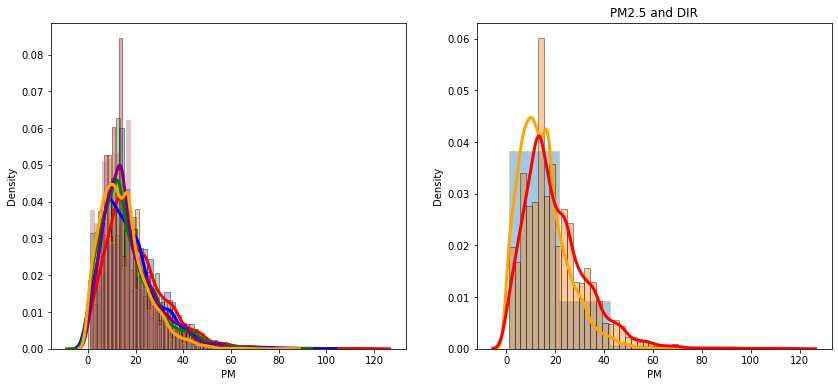

In [137]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('PM2.5 and DIR')     
sns.distplot(df15[df15['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:xlabel='PM', ylabel='Density'>

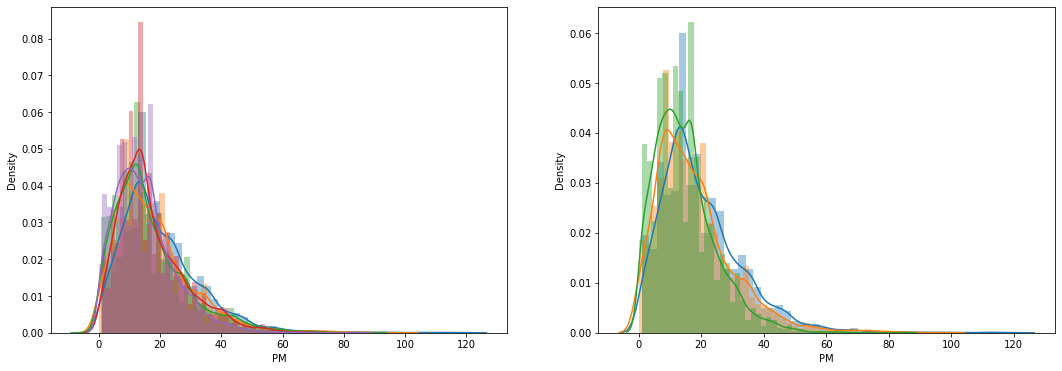

In [138]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,ax=ax[0])
sns.distplot(df15[df15['SiteEngName']=='Songshan'].PM,ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Songshan'].PM,ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Songshan'].PM,ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,ax=ax[0])

sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,ax=ax[1])
sns.distplot(df15[df15['SiteEngName']=='Songshan'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,ax=ax[1])

C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:xlabel='PM', ylabel='Density'>

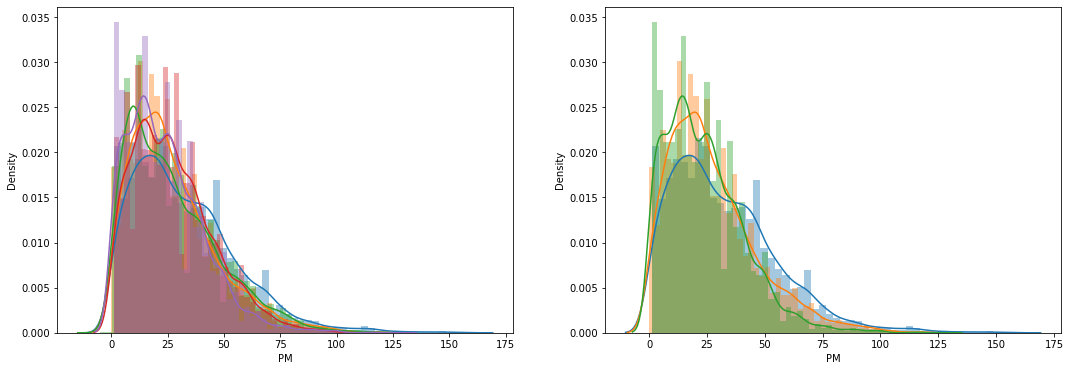

In [139]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,ax=ax[0])
sns.distplot(df15[df15['SiteEngName']=='Chiayi'].PM,ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Chiayi'].PM,ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Chiayi'].PM,ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,ax=ax[0])

sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,ax=ax[1])
sns.distplot(df15[df15['SiteEngName']=='Chiayi'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,ax=ax[1])

C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:xlabel='PM', ylabel='Density'>

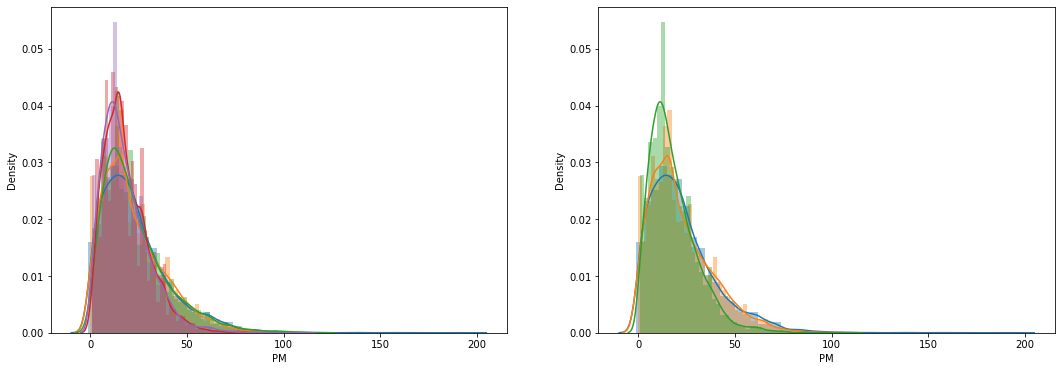

In [140]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Fengyuan'].PM,ax=ax[0])
sns.distplot(df15[df15['SiteEngName']=='Fengyuan'].PM,ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Fengyuan'].PM,ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Fengyuan'].PM,ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Fengyuan'].PM,ax=ax[0])

sns.distplot(df14[df14['SiteEngName']=='Fengyuan'].PM,ax=ax[1])
sns.distplot(df15[df15['SiteEngName']=='Fengyuan'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Fengyuan'].PM,ax=ax[1])

In [141]:
MAX = 100000
  
def Print3Smallest(arr, n): 
    firstmin = MAX
    secmin = MAX
    thirdmin = MAX
  
    for i in range(0, n): 
          
        # Check if current element 
        # is less than firstmin,  
        # then update first,second 
        # and third 
  
        if arr[i] < firstmin: 
            thirdmin = secmin 
            secmin = firstmin 
            firstmin = arr[i] 
  
        # Check if current element is 
        # less than secmin then update 
        # second and third 
        elif arr[i] < secmin: 
            thirdmin = secmin 
            secmin = arr[i] 
  
        # Check if current element is 
        # less than,then upadte third 
        elif arr[i] < thirdmin: 
            thirdmin = arr[i] 
  
    print("First min = ", firstmin) 
    print("Second min = ", secmin) 
    print("Third min = ", thirdmin) 
  
  
# driver program 
arr = opv
n = len(arr) 
Print3Smallest(arr, n) 

First min =  0.03721445565589466
Second min =  0.04023411328800657
Third min =  0.043167139728129904


In [142]:
import sys 
  
# Function to print largest element in 
# first half and second half of an array 
def findMax(arr, n) : 
  
    # To store the maximum element 
    # in the first half 
    maxFirst = -sys.maxsize - 1
  
    # Middle index of the array 
    mid = n // 2; 
  
    # Calculate the maximum element 
    # in the first half 
    for i in range(0, mid): 
        maxFirst = max(maxFirst, arr[i]) 
  
    # If the size of array is odd then 
    # the middle element will be included 
    # in both the halves 
    if (n % 2 == 1): 
        maxFirst = max(maxFirst, arr[mid]) 
  
    # To store the maximum element 
    # in the second half 
    maxSecond = -sys.maxsize - 1
  
    # Calculate the maximum element 
    # int the second half 
    for i in range(mid, n): 
        maxSecond = max(maxSecond, arr[i]) 
  
    # Print the found maximums 
    print(maxFirst, ",", maxSecond) 
  
# Driver code 
arr = opv
n = len(arr) 
  
findMax(arr, n) 

0.9873112244993114 , 0.9579167653998883


In [143]:
opv

[0.194223187655058,
 0.5699325962823711,
 0.31558932171814835,
 0.47813432502762,
 0.7501220406300386,
 0.03721445565589466,
 0.7343868424609313,
 0.5388872718471552,
 0.9388376579565709,
 0.513749725472785,
 0.9873112244993114,
 0.7626740746806986,
 0.8167793595950654,
 0.3221359666574069,
 0.043167139728129904,
 0.49935191524233324,
 0.7241502403546475,
 0.2694695770540327,
 0.8189747945749717,
 0.8763136186954004,
 0.5680736271044797,
 0.5563297233653864,
 0.22406674310498487,
 0.4259663979909536,
 0.3070499928217636,
 0.8156357030095018,
 0.519121733074476,
 0.6950878451362921,
 0.22259339697094066,
 0.35902145709905176,
 0.3064787356327423,
 0.6334775252323833,
 0.6394248953321557,
 0.6368574650898708,
 0.8895243681940735,
 0.7253417483238055,
 0.39751763414591224,
 0.3383012764863664,
 0.9445901306395798,
 0.3284824759384628,
 0.6806324555536738,
 0.7313014015193222,
 0.6290094237826919,
 0.7992689067437057,
 0.34977452551882965,
 0.1766191722789711,
 0.20437914120241116,
 0.9579

In [144]:
np.concatenate([a,opv])

array(['Annan', 'Banqiao', 'Cailiao', 'Changhua', 'Chaozhou', 'Chiayi',
       'Dali', 'Daliao', 'Datong', 'Dayuan', 'Dongshan', 'Douliu',
       'Erlin', 'Fengshan', 'Fengyuan', 'Fuxing', 'Guanshan', 'Guanyin',
       'Guting', 'Hengchun', 'Hsinchu', 'Hualien', 'Hukou', 'Keelung',
       'Kinmen', 'Linkou', 'Linyuan', 'Longtan', 'Lunbei', 'Magong',
       'Mailiao', 'Matsu', 'Meinong', 'Miaoli', 'Nantou', 'Nanzi',
       'Pingtung', 'Pingzhen', 'Puli', 'Puzi', 'Qianjin', 'Qianzhen',
       'Qiaotou', 'Renwu', 'Sanchong', 'Sanyi', 'Shalu', 'Shanhua',
       'Shilin', 'Songshan', 'Tainan', 'Taitung', 'Taixi', 'Tamsui',
       'Taoyuan', 'Toufen', 'Tucheng', 'Wanhua', 'Wanli', 'Xianxi',
       'Xiaogang', 'Xindian', 'Xingang', 'Xinying', 'Xinzhuang', 'Xitun',
       'Xizhi', 'Yangming', 'Yilan', 'Yonghe', 'Zhongli', 'Zhongming',
       'Zhongshan', 'Zhudong', 'Zhushan', 'Zuoying', 0.194223187655058,
       0.5699325962823711, 0.31558932171814835, 0.47813432502762,
       0.75012204063003

In [145]:
import heapq
import numpy
a = numpy.array([1, 3, 2, 4, 5])
heapq.nlargest(3, range(len(a)), a.take)


[4, 3, 1]

In [146]:
a

array([1, 3, 2, 4, 5])

In [147]:

ak = numpy.array(opv)
heapq.nlargest(10, range(len(a)), a.take)

[4, 3, 1, 2, 0]

In [148]:
print(js_divergence(y4,y5))
print(js_divergence(y5,y4))
print(js_divergence(y5,y6))
print(js_divergence(y6,y5))
print(js_divergence(y6,y7))
print(js_divergence(y7,y6))
print(js_divergence(y7,y8))
print(js_divergence(y8,y7))

95.2124034295486
95.2124034295486
90.30783721874559
90.30783721874559
70.51216254397042
70.51216254397042
173.42400685781263
173.42400685781263


In [149]:
a=df14['SiteEngName'].unique()
for i in range(76):
    a1=(df4[df14.SiteEngName==a[i]])
    a2=(df5[df15.SiteEngName==a[i]])
    a3=(df6[df16.SiteEngName==a[i]])
    a4=(df7[df17.SiteEngName==a[i]])
    a5=(df8[df18.SiteEngName==a[i]])
    b1=a1.PM
    b2=a2.PM
    b3=a3.PM
    b4=a4.PM
    b5=a5.PM
    print(a[i])
    counts, bin_edges = np.histogram(b1,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab4=counts
    print(ab4)
    counts, bin_edges = np.histogram(b2,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab5=counts
    print(ab5)
    counts, bin_edges = np.histogram(b3,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab6=counts
    print(ab6)
    counts, bin_edges = np.histogram(b4,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab7=counts
    print(ab7)
    counts, bin_edges = np.histogram(b5,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab8=counts
    print(ab8)
    print('=============')
    print(js_divergence(ab4,ab5))
    print(js_divergence(ab5,ab4))
    #print(js_divergence(y5,y6))
    #print(js_divergence(y6,y5))
    #print(js_divergence(y6,y7))
   # print(js_divergence(y7,y6))
   # print(js_divergence(y7,y8))
   # print(js_divergence(y8,y7))

    

Annan
[ 415  940 1037 1010  826  759  879  602  519  403  360  250  180  151
  131   62   56   35   31   25   89]
[ 793 1186 1216 1042  895  935  661  512  358  321  214  139  122  116
   80   67   34   25   12    9   23]
[ 613 1220 1079 1216  697  808  692  481  510  298  294  185  179  120
  113   70   68   40   29   21   50]
[ 414 1065 1255 1145 1174  953  726  576  534  296  212  143   97   76
   42   30    8    5    4    1    4]
[ 592 1197 1339 1164  933  858  727  662  417  309  185  106   64   67
   48   35   28   13    5    5    6]
153.35883162108576
153.35883162108576
Banqiao
[ 418  990 1652 1795  950  887  611  400  324  218  114  107   87   46
   58   33   15   21   20    7    7]
[ 393  868 1834 1932 1265  855  516  369  257  165  113   54   53   38
   25   16    4    2    1    0    0]
[ 950 1590 1550 1424 1100  604  470  271  249  200  125   88   78   39
   22   10    4    5    4    1    0]
[ 832 2016 2008 1164  976  670  429  272  152  114   54   38   14   12
    5    3   

ValueError: math domain error

In [151]:
a=df14['SiteEngName'].unique()
for i in range(76):
    a1=(df4[df14.SiteEngName==a[i]])
    a2=(df5[df15.SiteEngName==a[i]])
    a3=(df6[df16.SiteEngName==a[i]])
    a4=(df7[df17.SiteEngName==a[i]])
    a5=(df8[df18.SiteEngName==a[i]])
    y4=a1.PM
    y5=a2.PM
    y6=a3.PM
    y7=a4.PM
    y8=a5.PM
    print(a[i])
    print(========)
    print()


    

SyntaxError: invalid syntax (<ipython-input-151-65422585ad1c>, line 14)

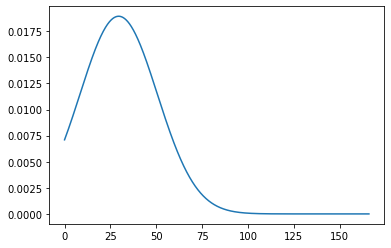

In [152]:
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm
# define the distribution parameters
sample_space = arange(0, 166, 0.1)
mean = 29.5
stdev = 21.06
# calculate the pdf
pdf = norm.pdf(sample_space, mean, stdev)
# plot
a=pdf
pyplot.plot(sample_space, pdf)
pyplot.show()

In [153]:
print(pdf)

[7.10200631e-03 7.14932059e-03 7.19678782e-03 ... 1.56760382e-11
 1.52017935e-11 1.47415638e-11]


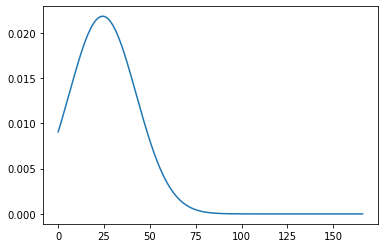

In [154]:
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm
# define the distribution parameters
sample_space = arange(0, 166, 0.1)
mean = 24.24
stdev = 18.27
# calculate the pdf
pdf = norm.pdf(sample_space, mean, stdev)
# plot
b=pdf
pyplot.plot(sample_space, pdf)
pyplot.show()

In [155]:
import numpy as np

def KL(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))


#values1 = p
#values2 = q
print(KL(a,b))

0.736757482240308


<ipython-input-155-101e2a5c0a7e>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.asarray(a, dtype=np.float)
<ipython-input-155-101e2a5c0a7e>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.asarray(b, dtype=np.float)


In [156]:
print(KL(b,a))

0.364401597663084


<ipython-input-155-101e2a5c0a7e>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.asarray(a, dtype=np.float)
<ipython-input-155-101e2a5c0a7e>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.asarray(b, dtype=np.float)


In [157]:
r.PM

0         52.0
76        49.0
152       53.0
228       56.0
304       53.0
          ... 
665380    40.0
665456    50.0
665532    55.0
665608    56.0
665684    53.0
Name: PM, Length: 8760, dtype: float64

In [158]:
qw=r.PM[((r.PM)>50) & ((r.PM)<100)].std()

In [159]:
qw

11.485587636352136

In [160]:
qw=r.PM[((r.PM)>50) & ((r.PM)<100)]

In [161]:
qw.count()

1206

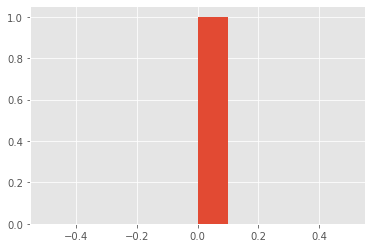

In [162]:
plt.style.use('ggplot')
plt.hist(p, bins=10)
plt.show()

In [163]:
from scipy.spatial.distance import jensenshannon
from numpy import asarray

In [164]:
def js_div(pr, qr):
	m = (0.5 * (pr + qr))
	return ((0.5 * KL(pr, m)) + (0.5 * KL(qr, m)))
js_pq = js_div(pr, qr)


<ipython-input-155-101e2a5c0a7e>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.asarray(a, dtype=np.float)
<ipython-input-155-101e2a5c0a7e>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.asarray(b, dtype=np.float)


In [165]:
js_div(pr, qr)

<ipython-input-155-101e2a5c0a7e>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.asarray(a, dtype=np.float)
<ipython-input-155-101e2a5c0a7e>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.asarray(b, dtype=np.float)


48.422512286230415

In [166]:
print(KL(y4,y5))

271.3098343322649


<ipython-input-155-101e2a5c0a7e>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.asarray(a, dtype=np.float)
<ipython-input-155-101e2a5c0a7e>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.asarray(b, dtype=np.float)


In [167]:
print(KL(y4,y5))
print(KL(y5,y4))
print(KL(y5,y6))
print(KL(y6,y5))
print(KL(y6,y7))
print(KL(y7,y6))
print(KL(y7,y8))
print(KL(y8,y7))

271.3098343322649
261.4571766504582
228.25998606221532
276.84749216784036
229.43924342786096
170.73216183661236
559.5229599714968
443.2268541281305


<ipython-input-155-101e2a5c0a7e>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.asarray(a, dtype=np.float)
<ipython-input-155-101e2a5c0a7e>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.asarray(b, dtype=np.float)


In [168]:
y4[i]

966

In [169]:
y4[2]

823

In [170]:
from math import log2
 
# calculate the kl divergence
def kl_divergence(p14, q14):
	return sum(p14[i] * log2(p14[i]/q14[i]) for i in range(len(p14)))
 
# define distributions
#p = [0.10, 0.40, 0.50]
#q = [0.80, 0.15, 0.05]
p14=y4
q14=y5
# calculate (P || Q)
kl_pq = kl_divergence(p14, q14)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(q14, p14)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): 391.417 bits
KL(Q || P): 377.203 bits


In [171]:
kl_pq

391.41735253556476

In [172]:
from scipy import stats
pq=391.978
qp=339.919
#ats.ttest_ind(pq,qp,eual_var = True)

In [173]:
rvs1=p
rvs2=q
stats.ttest_ind(rvs2,rvs1)

C:\Users\Khalid\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Khalid\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=nan, pvalue=nan)

In [174]:
y4

array([546, 966, 823, 881, 751, 749, 739, 559, 634, 532, 419, 275, 225,
       167, 154,  80,  77,  44,  28,  17,  94], dtype=int64)

In [175]:
rvs1 = stats.norm.rvs(y4)
rvs2=stats.norm.rvs(y5)

In [176]:
stats.ttest_ind(rvs2,rvs1)

Ttest_indResult(statistic=-0.0030550182900057916, pvalue=0.9975776375499295)

In [177]:
stats.ttest_ind(rvs1,rvs)

Ttest_indResult(statistic=array([9.14108877, 9.15177685]), pvalue=array([1.65343265e-13, 1.58117031e-13]))

In [178]:
stats.ttest_ind(y4,y5)
stats.ttest_ind(y5,y6)
stats.ttest_ind(y6,y5)

Ttest_indResult(statistic=0.007351556635025124, pvalue=0.9941709027480943)

In [179]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
def boot_matrix(z, B):
    """Bootstrap sample
    
    Returns all bootstrap samples in a matrix"""
    
    n = len(z)  # sample size
    idz = np.random.randint(0, n, size=(B, n))  # indices to pick for all boostrap samples
    return z[idz]


In [180]:
def bootstrap_t_pvalue(x, y, equal_var=False, B=100000, plot=False):
    """Bootstrap p values for two-sample t test
    
    Returns boostrap p value, test statistics and parametric p value"""
    
    # Original t test statistic
    orig = stats.ttest_ind(x, y, equal_var=equal_var)
    
    # Generate boostrap distribution of t statistic
    xboot = boot_matrix(x - x.mean(), B=B) # important centering step to get sampling distribution under the null
    yboot = boot_matrix(y - y.mean(), B=B)
    sampling_distribution = stats.ttest_ind(xboot, yboot, axis=1, equal_var=equal_var)[0]

    # Calculate proportion of bootstrap samples with at least as strong evidence against null    
    p = np.mean(sampling_distribution >= orig[0])
    
    # RESULTS
    print("p value for null hypothesis of equal population means:")
    print("Parametric:", orig[1])
    print("Bootstrap:", 2*min(p, 1-p))
    
    # Plot bootstrap distribution
    if plot:
        plt.figure()
        plt.hist(sampling_distribution, bins="fd")

In [181]:
#np.random.seed(984564) # for reproducability
#x = np.random.normal(loc=11, scale=20, size=30)
#y = np.random.normal(loc=15, scale=20, size=20)
x=y4
y=y5
%time bootstrap_t_pvalue(x, y)

p value for null hypothesis of equal population means:
Parametric: 1.0
Bootstrap: 0.9964599999999999
Wall time: 113 ms


In [182]:
x

array([546, 966, 823, 881, 751, 749, 739, 559, 634, 532, 419, 275, 225,
       167, 154,  80,  77,  44,  28,  17,  94], dtype=int64)

p value for null hypothesis of equal population means:
Parametric: 1.0
Bootstrap: 0.9948999999999999


<IPython.core.display.Javascript object>


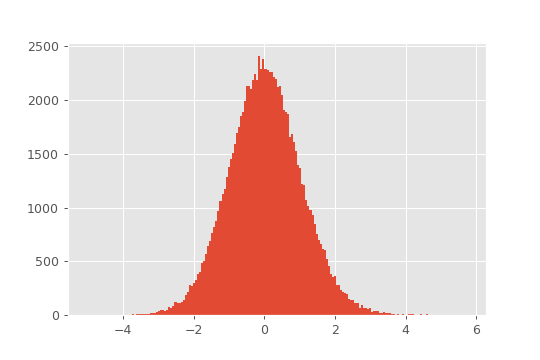

In [183]:
#np.random.seed(345244) # for reproducability
#x = np.random.normal(loc=11, scale=20, size=30)
#y = np.random.normal(loc=15, scale=10, size=20)
bootstrap_t_pvalue(x, y, plot=True)

p value for null hypothesis of equal population means:
Parametric: 1.0
Bootstrap: 0.99884


<IPython.core.display.Javascript object>


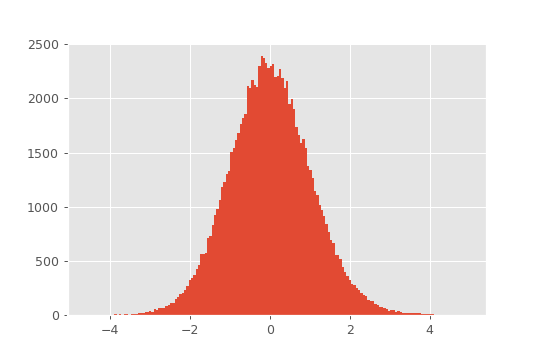

In [184]:
bootstrap_t_pvalue(y4, y5, plot=True)

p value for null hypothesis of equal population means:
Parametric: 1.0
Bootstrap: 0.99158


<IPython.core.display.Javascript object>


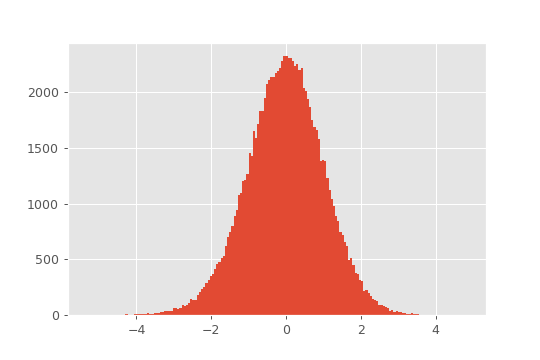

In [185]:
bootstrap_t_pvalue(y5, y4, plot=True)

In [186]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
np.random.seed(6)
population_ages1=stats.poisson.rvs(loc=18,mu=35,size=150000)
population_ages2=stats.poisson.rvs(loc=18,mu=10,size=100000)
population_ages=np.concatenate((population_ages1,population_ages2))
gujarat_ages1=stats.poisson.rvs(loc=18,mu=30,size=30)
gujarat_ages2=stats.poisson.rvs(loc=18,mu=10,size=20)
gujarat_ages=np.concatenate((gujarat_ages1,gujarat_ages2))
population_ages.mean()

43.000112

In [187]:
from scipy import stats
rvs = stats.norm.rvs(loc = 5, scale = 10, size = (50,2))
print (stats.ttest_1samp(rvs,5.0))

Ttest_1sampResult(statistic=array([-0.50384299, -0.39054097]), pvalue=array([0.61662961, 0.69782934]))


In [188]:
print (stats.ttest_1samp(y4,10.0))

Ttest_1sampResult(statistic=5.789990244981329, pvalue=1.1515487013722054e-05)


In [189]:
#J_S Divergence

In [190]:
from math import log2
from math import sqrt
from numpy import asarray
 
# calculate the kl divergence
def kl_divergence(pr, qr):
	return sum(pr[i] * log2(pr[i]/qr[i]) for i in range(len(pr)))
pr=np.asarray(y4)
qr=np.asarray(y5)
def js_divergence(pr, qr):
	m = (0.5 * (pr + qr))
	return 0.5 * kl_divergence(pr, m) + (0.5 * kl_divergence(qr, m))
js_pq = js_divergence(pr, qr)
print('JS(P || Q) divergence: %.3f bits' % js_pq)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq))


JS(P || Q) divergence: 95.212 bits
JS(P || Q) distance: 9.758


In [191]:
y4

array([546, 966, 823, 881, 751, 749, 739, 559, 634, 532, 419, 275, 225,
       167, 154,  80,  77,  44,  28,  17,  94], dtype=int64)

In [192]:
from math import log2
from math import sqrt
from numpy import asarray
 
# calculate the kl divergence
def kl_divergence(pr, qr):
	return sum(pr[i] * log2(pr[i]/qr[i]) for i in range(len(pr)))
kl_pq = kl_divergence(pr, qr)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(qr, pr)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): 391.417 bits
KL(Q || P): 377.203 bits


In [193]:
...
# calculate JS(Q || P)
js_qp = js_divergence(qr, pr)
print('JS(Q || P) divergence: %.3f bits' % js_qp)
print('JS(Q || P) distance: %.3f' % sqrt(js_qp))

JS(Q || P) divergence: 95.212 bits
JS(Q || P) distance: 9.758


In [194]:
from scipy.spatial.distance import jensenshannon
from numpy import asarray
# define distributions
#p = asarray([0.10, 0.40, 0.50])
#q = asarray([0.80, 0.15, 0.05])
# calculate JS(P || Q)
js_pq = jensenshannon(pr, qr,base=2)
print('JS(P || Q) Distance: %.3f' % js_pq)
# calculate JS(Q || P)
js_qp = jensenshannon(qr, pr, base=2)
print('JS(Q || P) Distance: %.3f' % js_qp)

JS(P || Q) Distance: 0.104
JS(Q || P) Distance: 0.104


In [195]:
print(jensenshannon(pr, qr))
print(jensenshannon(qr, pr))

0.0867975449642338
0.0867975449642338


In [196]:
from scipy.spatial import distance
distance.jensenshannon(pr,qr)

0.0867975449642338

In [197]:
from scipy.spatial.distance import jensenshannon
from numpy import asarray
# define distributions
#pr1 = asarray([0.10, 0.40, 0.50])
#qr1 = asarray([0.80, 0.15, 0.05])
# calculate JS(P || Q)
js_pq1 = jensenshannon(pr1, qr1,base=2)
print('JS(P || Q) Distance: %.3f' % js_pq1)
# calculate JS(Q || P)
js_qp1 = jensenshannon(qr1, pr1, base=2)
print('JS(Q || P) Distance: %.3f' % js_qp1)

NameError: name 'pr1' is not defined

In [198]:
from math import log2
from math import sqrt
from numpy import asarray
 
# calculate the kl divergence
def kl_divergence(pr1, qr1):
	return sum(pr1[i] * log2(pr1[i]/qr1[i]) for i in range(len(pr1)))
pr1 = y4
qr1 = y5
def js_divergence(pr1, qr1):
	m = 0.5 * (pr1 + qr1)
	return 0.5 * kl_divergence(pr1, m) + 0.5 * kl_divergence(qr1, m)
js_pq1 = js_divergence(pr1, qr1)
print('JS(P || Q) divergence: %.3f bits' % js_pq1)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq1))


JS(P || Q) divergence: 95.212 bits
JS(P || Q) distance: 9.758
